<h1>MENSAJES TÓXICOS EN YOU TUBE</h1>

<h6>Este cuaderno es un ejemplo de análisis exploratorio de datos (EDA por sus siglas en inglés) ejecutado sobre el dataset YOUTOXIC_ENGLISH_1000-CSV donde se recogen datos de mensajes de la plataforma de youtube.

El ejercicio consiste en plotear gráficas interesantes buscando patrones relevantes que pudieran ser útiles en la predicción de alquileres de viviendas con fines vacacionales</h6>



In [2]:
# Importar librerias¶
import pandas as pd
import numpy as np
import re, string

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('youtoxic_english_1000.csv')

In [4]:
print(df.shape)
df.head()

(1000, 15)


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# formato de los datos
df.dtypes

CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
# Conocer datos nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [8]:
# Datos estadísticos
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [9]:
# Descripción de columnas
df.columns

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.corr()

/tmp/ipykernel_27652/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
IsToxic,1.000000,0.797086,0.158048,0.472718,0.359707,0.431774,0.407869,0.096908,0.034142,NaN,0.118928,NaN
IsAbusive,0.797086,1.000000,0.198282,0.593057,0.451277,-0.119603,-0.121005,-0.042843,0.042833,NaN,-0.042970,NaN
IsThreat,0.158048,0.198282,1.000000,0.106626,-0.048820,0.002063,-0.034268,-0.013152,-0.004634,NaN,0.111962,NaN
IsProvocative,0.472718,0.593057,0.106626,1.000000,0.089788,-0.072719,-0.075072,-0.008796,-0.013860,NaN,0.001699,NaN
IsObscene,0.359707,0.451277,-0.048820,0.089788,1.000000,-0.027061,-0.035277,-0.029934,0.094916,NaN,-0.036736,NaN
IsHatespeech,0.431774,-0.119603,0.002063,-0.072719,-0.027061,1.000000,0.944637,0.224442,0.079074,NaN,0.275440,NaN
IsRacist,0.407869,-0.121005,-0.034268,-0.075072,-0.035277,0.944637,1.000000,0.237595,-0.011958,NaN,0.013885,NaN
IsNationalist,0.096908,-0.042843,-0.013152,-0.008796,-0.029934,0.224442,0.237595,1.000000,-0.002841,NaN,-0.009897,NaN
IsSexist,0.034142,0.042833,-0.004634,-0.013860,0.094916,0.079074,-0.011958,-0.002841,1.000000,NaN,-0.003487,NaN
IsHomophobic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Establecer el porcentaje de una columna de datos de visualización
def porcentaje_grafico(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()*100/df.shape[0]:.2f}%",(p.get_x()+p.get_width()/2,p.get_height()),
                   ha="center",va="center",fontsize=11,color="black",rotation=0,xytext=(0,10),textcoords="offset points")

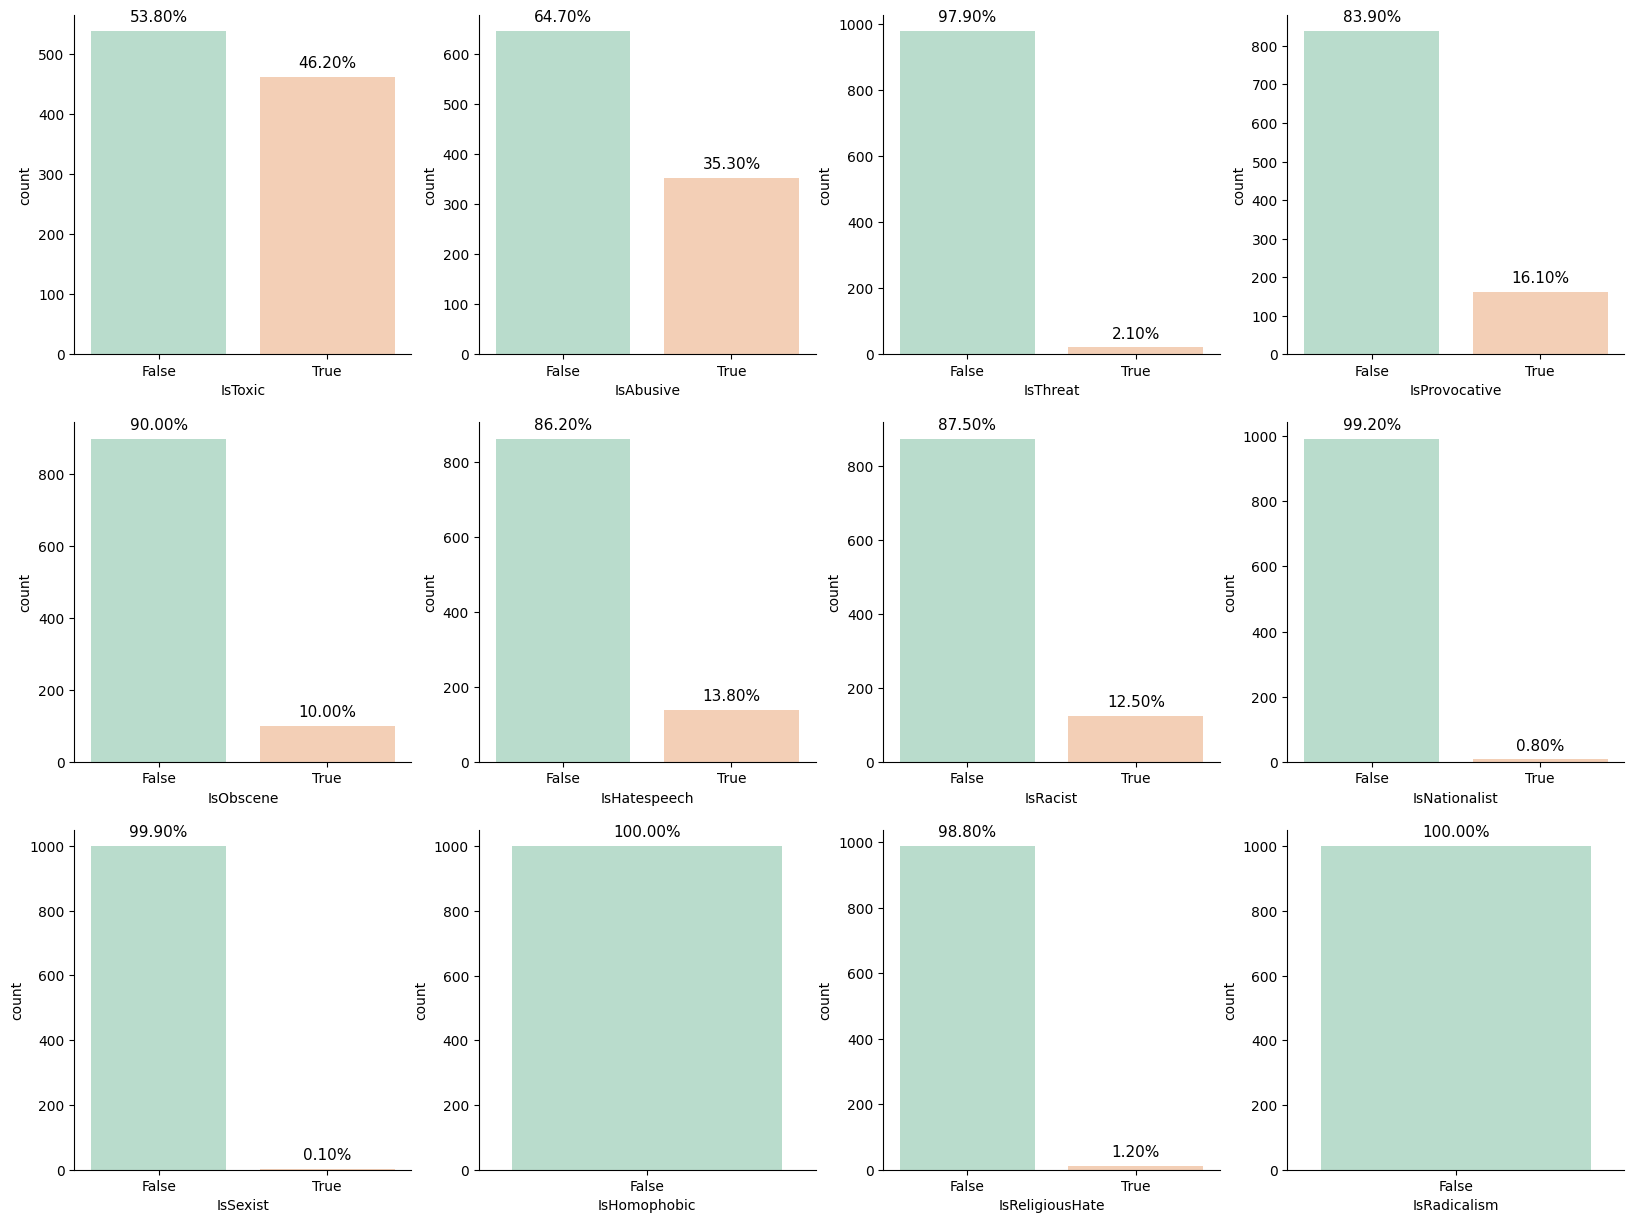

In [13]:
variables_binarias=["IsToxic",'IsAbusive',"IsThreat",  "IsProvocative" , "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate", "IsRadicalism" ]

fig,axes=plt.subplots(nrows=3,ncols=4,figsize=(20,15))
for i,item in enumerate(variables_binarias): #enumerate()
    plt.subplot(3,4,(i+1))
    ax = sns.countplot(x=item,data=df,palette="Pastel2")
    plt.xlabel(str(item))
    #plt.title("Categorias de Toxicidad "+str(item))
    i=i+1
    porcentaje_grafico(ax)
plt.show()

In [14]:
# Prescindimos de CommentId,VideoId, IsHomophobic, IsReligiousHate
df.drop(["CommentId","VideoId",'IsHomophobic', 'IsRadicalism'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             1000 non-null   object
 1   IsToxic          1000 non-null   bool  
 2   IsAbusive        1000 non-null   bool  
 3   IsThreat         1000 non-null   bool  
 4   IsProvocative    1000 non-null   bool  
 5   IsObscene        1000 non-null   bool  
 6   IsHatespeech     1000 non-null   bool  
 7   IsRacist         1000 non-null   bool  
 8   IsNationalist    1000 non-null   bool  
 9   IsSexist         1000 non-null   bool  
 10  IsReligiousHate  1000 non-null   bool  
dtypes: bool(10), object(1)
memory usage: 17.7+ KB


In [15]:
categoricas =[ 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsReligiousHate']

In [16]:
# Información cuantitativa de variables categóricas.
for col in categoricas:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: Text
run them over                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [17]:
# Calcular la columna toxico en base a las columnas booleanas
def crear_columna_Toxico(df):
    df_Toxico = []
    """Se crea la columna Toxico, con la condición --> Si alguna de las categorias existentes tiene al menos un True ,
    entonces el valor de la columna Toxico es True ó 1"""
    for row in range(len(df)):
        if df.iloc[row]["IsToxic"] == True or df.iloc[row]["IsAbusive"] == True or df.iloc[row]["IsThreat"] == True or df.iloc[row]["IsProvocative"] == True   or df.iloc[row]["IsObscene"] == True or df.iloc[row]["IsHatespeech"]  == True or df.iloc[row]["IsRacist"] == True    or df.iloc[row]["IsNationalist"] == True or  df.iloc[row]["IsReligiousHate"] == True  or  df.iloc[row]["IsSexist"] == True:
            df_Toxico.append(1)
        else:
            df_Toxico.append(0)
    df["Toxico"] = df_Toxico
    df = df.drop(['IsToxic', 'IsAbusive', 'IsThreat','IsProvocative', 'IsHatespeech', 'IsObscene','IsRacist', 'IsNationalist', 'IsReligiousHate','IsSexist'], axis=1)
    return df

In [18]:
# Se aplica el metodo de crear la Columna Toxico, y se eliminan las otras categorías.
df =crear_columna_Toxico(df)
df.head(5)

,Text,Toxico
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


## NLP Procesamiento del lenguaje Natural

In [19]:
def minusculas(text):
    text_limpio = text.lower()
    return text_limpio

df['Text'] = df['Text'].apply(minusculas)
df

,Text,Toxico
0,if only people would just take a step back and...,0
1,law enforcement is not trained to shoot to app...,1
2,\ndont you reckon them 'black lives matter' ba...,1
3,there are a very large number of people who do...,0
4,"the arab dude is absolutely right, he should h...",0
...,...,...
995,i remember that they sent in the national defe...,0
996,stats don`t represent the problem. race baitin...,1
997,the quote from the mother... wow that hit hard...,0
998,this video is so racist,0


In [20]:
## Eliminar tildes y caracteres especiales
def limpiar_caracteres(text):
    text_limpio = re.sub('.?¿', '', text)
    re.sub('[0-9]+', '', text_limpio)
    text_limpio = re.sub('[%s]' % re.escape(string.punctuation), '', text_limpio)
    text_limpio = re.sub('\w\d\w*', '', text_limpio)
    text_limpio = re.sub('\n', '', text_limpio)
    return text_limpio

In [21]:
df['Text'] = df['Text'].apply(limpiar_caracteres)
df

,Text,Toxico
0,if only people would just take a step back and...,0
1,law enforcement is not trained to shoot to app...,1
2,dont you reckon them black lives matter banner...,1
3,there are a very large number of people who do...,0
4,the arab dude is absolutely right he should ha...,0
...,...,...
995,i remember that they sent in the national defe...,0
996,stats dont represent the problem race baiting ...,1
997,the quote from the mother wow that hit hard ve...,0
998,this video is so racist,0


# Tokenizar

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Carga de librerías
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [25]:
import spacy

In [26]:
nlp = spacy.load("en_core_web_sm")
df["tokens"] = df["Text"].apply(lambda x: nlp.tokenizer(x))
df

,Text,Toxico,tokens
0,if only people would just take a step back and...,0,"(if, only, people, would, just, take, a, step,..."
1,law enforcement is not trained to shoot to app...,1,"(law, enforcement, is, not, trained, to, shoot..."
2,dont you reckon them black lives matter banner...,1,"(do, nt, you, reckon, them, black, lives, matt..."
3,there are a very large number of people who do...,0,"(there, are, a, very, large, number, of, peopl..."
4,the arab dude is absolutely right he should ha...,0,"(the, arab, dude, is, absolutely, right, he, s..."
...,...,...,...
995,i remember that they sent in the national defe...,0,"(i, remember, that, they, sent, in, the, natio..."
996,stats dont represent the problem race baiting ...,1,"(stats, do, nt, represent, the, problem, race,..."
997,the quote from the mother wow that hit hard ve...,0,"(the, quote, from, the, mother, wow, that, hit..."
998,this video is so racist,0,"(this, video, is, so, racist)"
